# **Heritage house price correlation notebook**

## Objectives

* Answer business requirement 1:
    * The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visilisations of the correlated variables against the sale price to showcase this.


## Inputs

* inputs/datasets/raw/house-price-20211124T154130Z-001

## Outputs

* Generate code that answers business requirement 1 and can be used to build the Streamlit App




---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-predictive-analytics/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-predictive-analytics'

# Load data

As specified in the data collection notebook, I have dropped the two categories with very high number of missing values.

In [4]:
import pandas as pd
df = (pd.read_csv(f"inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv")
        .drop(['EnclosedPorch', 'WoodDeckSF'], axis=1)
    )
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,548,RFn,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,460,RFn,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,608,RFn,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,642,Unf,1998.0,...,9550,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,836,RFn,2000.0,...,14260,84.0,350.0,84,5,8,1145,2000,2000,250000


---

# Data Exploration

We are interested to get more familiar with the dataset, check variable type and distribution, missing levels and what these variables mean in a business context

In [5]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

# Correlation Study

* One Hot Encoding has been used to create binary categories for GarageFinish.
* Ordinal encoding has been used to map BsmtExposure, BsmtFinType1 and KitchenQual, as these have ordinal relativity to their categories.<br><br>This setup should yield a more interpretable correlation matrix where higher values in each feature correspond more directly with SalePrice.

In [6]:
df_ohe = pd.get_dummies(df, columns=['GarageFinish'], prefix='GarageFinish', drop_first=True)

bsmt_exposure_mapping = {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
bsmt_fin_type1_mapping = {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
kitchen_qual_mapping = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

df_ohe['BsmtExposure'] = df['BsmtExposure'].map(bsmt_exposure_mapping)
df_ohe['BsmtFinType1'] = df['BsmtFinType1'].map(bsmt_fin_type1_mapping)
df_ohe['KitchenQual'] = df['KitchenQual'].map(kitchen_qual_mapping)

df.head()


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,548,RFn,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,460,RFn,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,608,RFn,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,642,Unf,1998.0,...,9550,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,836,RFn,2000.0,...,14260,84.0,350.0,84,5,8,1145,2000,2000,250000


We use `.corr()` for `spearman` and `pearson` methods, and investigate the top 10 correlations
* We sort values considering the absolute value, by setting `key=abs`

In [7]:
corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False).head(10)
corr_spearman

SalePrice       1.000000
OverallQual     0.809829
GrLivArea       0.731310
KitchenQual     0.672849
YearBuilt       0.652682
GarageArea      0.649379
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
Name: SalePrice, dtype: float64

We do the same for `pearson`

In [8]:
corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False).head(10)
corr_pearson

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
KitchenQual     0.659600
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
Name: SalePrice, dtype: float64

Both the Spearman and Pearson correlation coefficients reveal key features that are strongly correlated with the Sale price.<br><br>
* The Overall quality, ground living area and kitchen quality have the highest positive correlation in both analyses.
* Garage area and Total basement area both show strong positive relationships, highlighting the added value of larger, functional spaces.
* Year built and Year of Remodel are also correlated, meaning newer and more recently renovated homes tend to have higher values, although year of remodel has a lower corellation overall.
* 1st floor area also has a high correlation and I believe is a critical feature for predicting the house price.

Based on this, I will investigate the most relevant variables correlated to the sale price, which I believe to be:
* OverallQual - Overall quality of the build
* GrLivArea - Ground Living area
* GarageArea - Garage area
* TotalBsmtSF - Total basement area
* YearBuilt - Year of construction
* 1stFlrSF - 1st floor area


In [9]:
vars_to_study = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', '1stFlrSF']
vars_to_study

['OverallQual',
 'GrLivArea',
 'GarageArea',
 'TotalBsmtSF',
 'YearBuilt',
 '1stFlrSF']

# EDA on selected variables

In [10]:
df_eda = df.filter(vars_to_study + ['SalePrice'])
df_eda.head(3)

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,YearBuilt,1stFlrSF,SalePrice
0,7,1710,548,856,2003,856,208500
1,6,1262,460,1262,1976,1262,181500
2,7,1786,608,920,2001,920,223500


## Variables Distribution by Sale Price

The following scatter plots show the correlation between continuous variables (GrLivArea, GarageArea, TotalBsmtSF, 1stFlrSF, YearBuilt) and SalePrice.

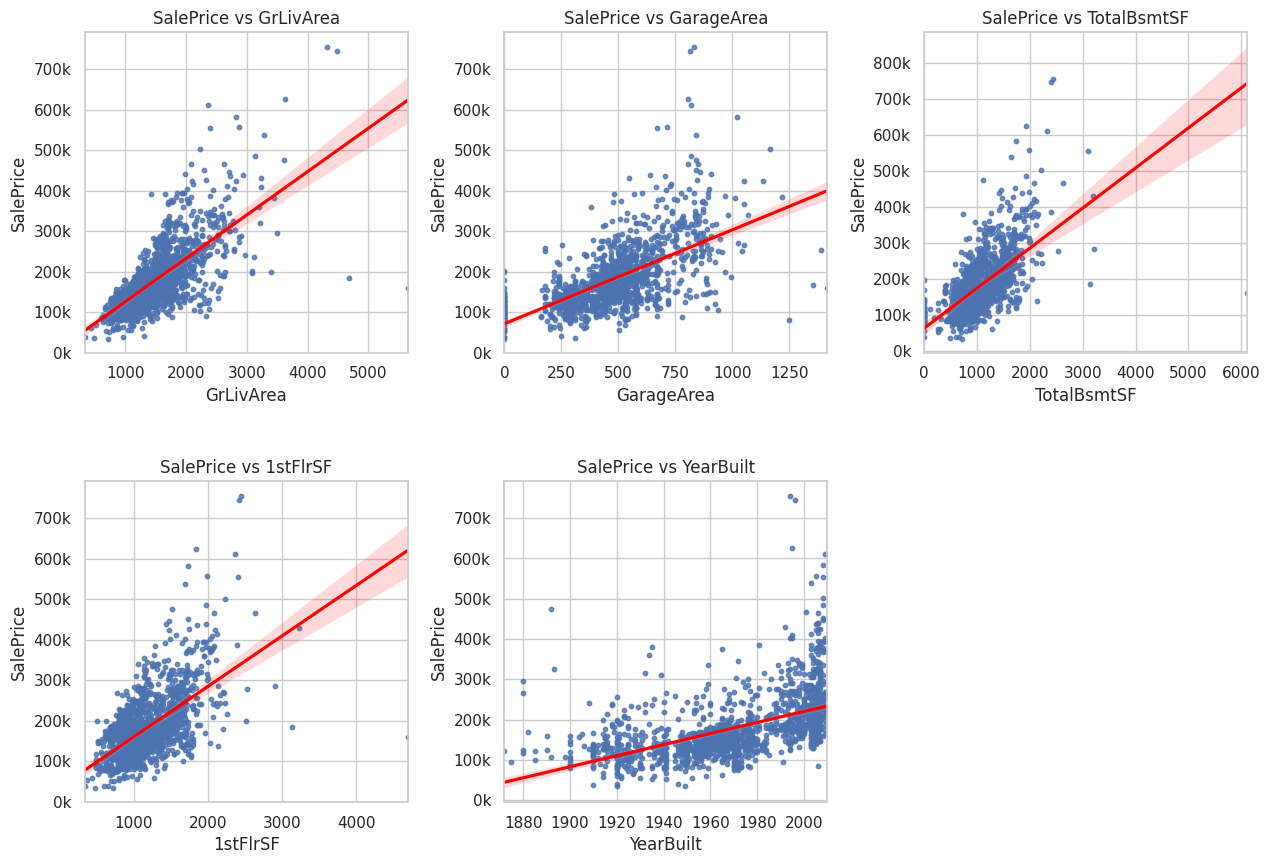

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
sns.set(style="whitegrid")

df_eda['PriceCategory'] = pd.qcut(df_eda['SalePrice'], q=3, labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(15, 10))

for i, var in enumerate(['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt']):
    plt.subplot(2, 3, i+1)
    sns.regplot(data=df_eda, x=var, y='SalePrice', scatter_kws={'s': 10}, line_kws={"color": "red"})
    plt.title(f'SalePrice vs {var}')
    plt.xlabel(var)
    plt.ylabel('SalePrice')

    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

The following box plot displays the median and quartile ranges of SalePrice across different quality levels, highlighting the spread of values within each quality rating.

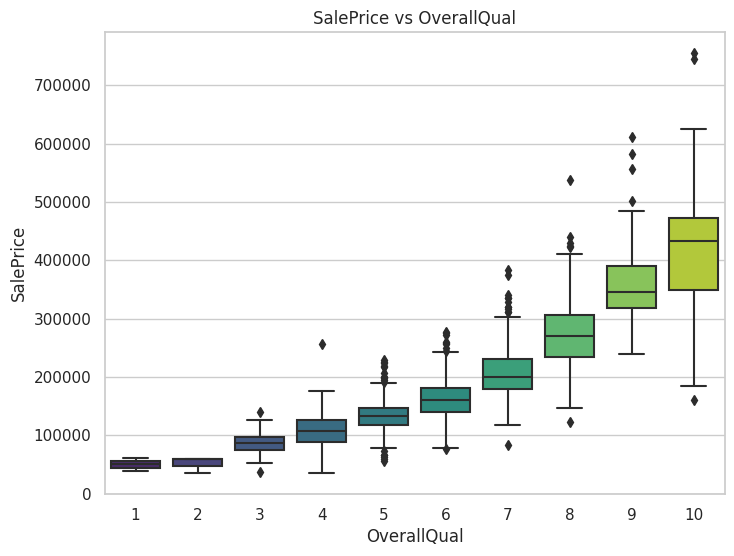

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_eda, x='OverallQual', y='SalePrice', palette='viridis')
plt.title('SalePrice vs OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

---

# Heat Map

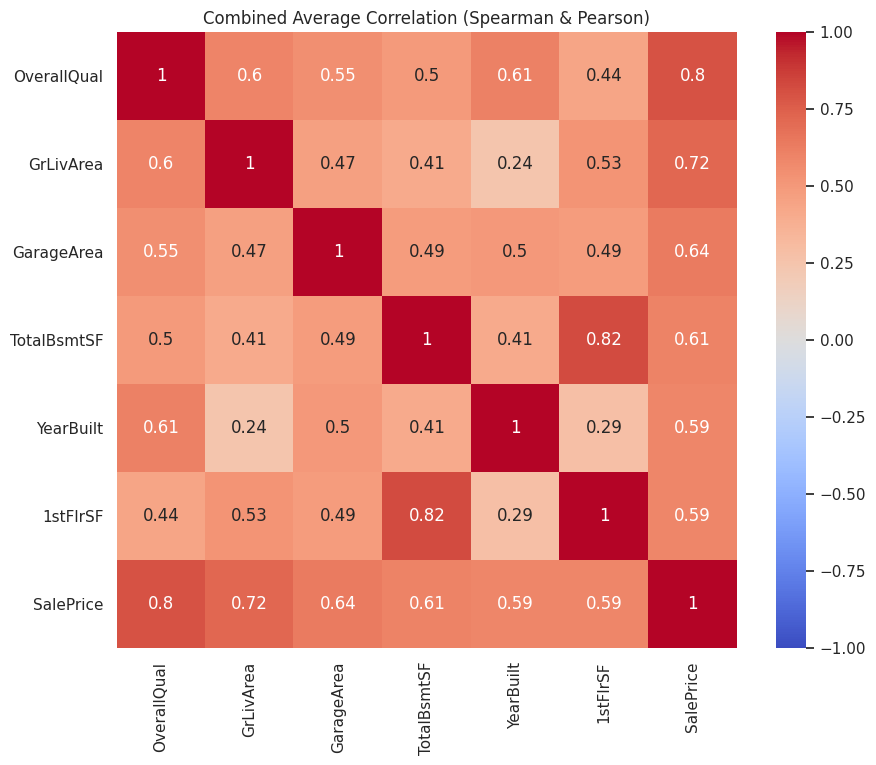

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_spearman = df_eda.corr(method='spearman')
corr_pearson = df_eda.corr(method='pearson')

combined_corr = (corr_spearman + corr_pearson) / 2

plt.figure(figsize=(10, 8))
sns.heatmap(combined_corr, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title("Combined Average Correlation (Spearman & Pearson)")
plt.show()

# Conclusions and Next Steps

* The analysis indicates that the overall build quality of a property (OverallQual) exhibits the strongest correlation with the Sale Price (SalePrice). This relationship is clearly illustrated in the box plot and is further supported by the highest correlation coefficients observed in both the Pearson and Spearman correlation methods.

* The variables ground living area (GrLivArea), 1st floor square footage (1stFlrSF), total basement area (TotalBsmtSF), and garage area (GarageArea) also show significant correlations with Sale Price. The accompanying scatterplots demonstrate steep positive linear regression lines, suggesting that these features play a substantial role in determining the sale price of a property.

* The year built (YearBuilt) has a stong correlation also so should not be overlooked. The scatterplot shows a positive linear regression. 